### Your name:

<pre> Helen Ng</pre>

### Collaborators:

<pre> Enter the name of the people you worked with if any</pre>


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Open the housing data


In [9]:
import os
import pandas as pd

HOUSING_Path = "C:/Users/nghel/Downloads"

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Build full pipeline for the data analysis following the example of the notebook.
 Hint: the main part requested to change is the algorithm used (KNN regression)


#### Considerations for building pipeline:

- Make your notebook as compact as possible. 
- Split data into training and testing sets below.
- Convert all categorical data to one-hot vectors below
- Normalize all non-categorical data 
-  Perform KNN regression using a variety of values for n_neighbors (K) between 1 and 10 and both "uniform" and "distance" weights via a grid search where  *housing_labels* is the output and all other features are the input (similar to as seen in lecture two.)

Step 1: Loading Housing Data
✓ Data loaded successfully
  Shape: (20640, 10)
  Rows: 20,640
  Columns: 10

  Columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity

Step 2: Exploratory Data Analysis

---Dataset Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non

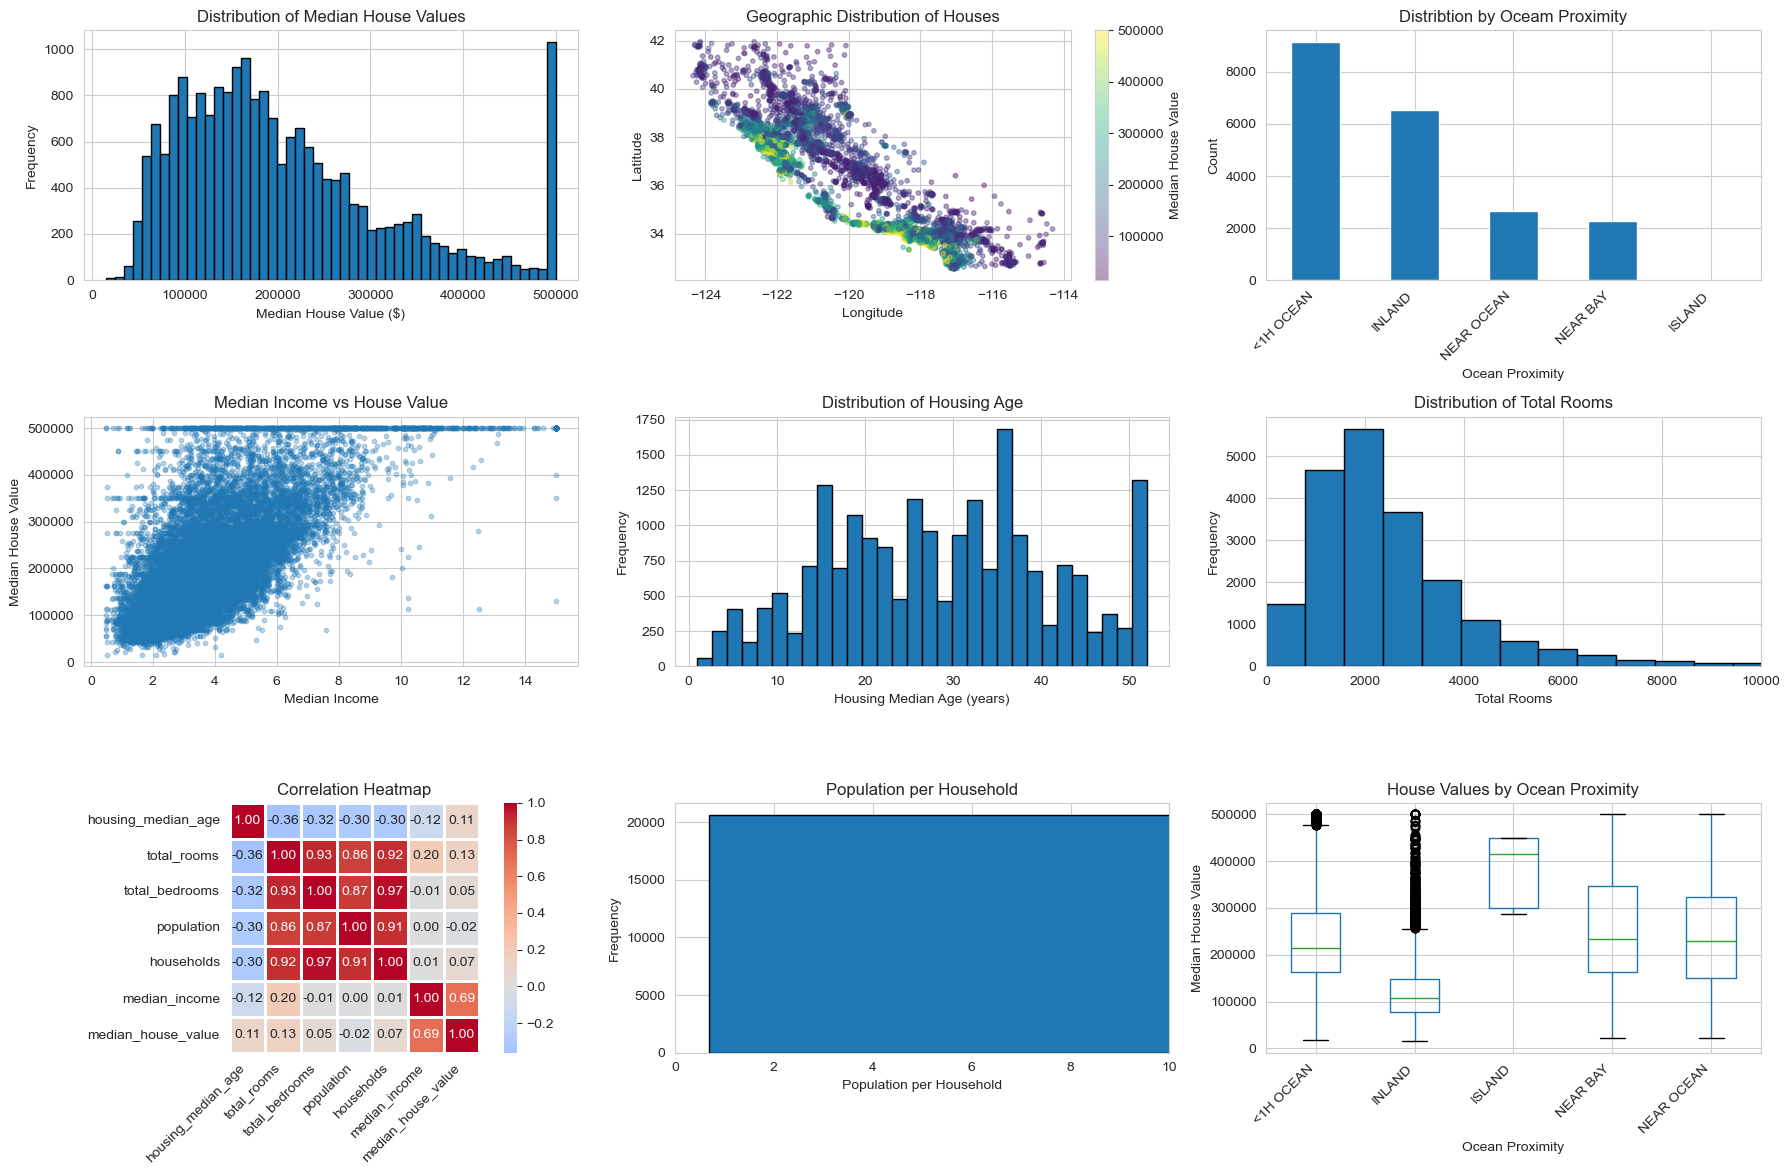


Step 4B: Test-Train Split

 IMPORTANT: Splitting BEFORE one-hot encoding and scaling
 This prevents data leakage from test set to training set


Step 4C: One-Hot Encoding (Post-Split)

[Applying one-hot encoding separately to train and test sets]
 Original categories: ['NEAR OCEAN', 'NEAR BAY', '<1H OCEAN', 'INLAND', 'ISLAND']
 One-hot encoding created 5 binary columns:
    - ocean_<1H OCEAN
    - ocean_INLAND
    - ocean_ISLAND
    - ocean_NEAR BAY
    - ocean_NEAR OCEAN

 Train features shape: (16512, 16)
 Test features shape: (4128, 16)
 Total features: 16

Step 4D: Feature Scaling (Post-Split)

 Important: Fit scaler on training data only!
 Then transform both train and test sets

 Features scaled using StandardScaler
 Training set mean: -0.000000 (should be ~0)
 Training set std: 1.000000 (should be ~1)
 Test set mean: -0.002584
 Test set std: 0.933402

Step 6: Model Training

[1] Training Random Forest Regressor
Random Forest trained successfully
 Training R2 Score: 0.9716
 Trai

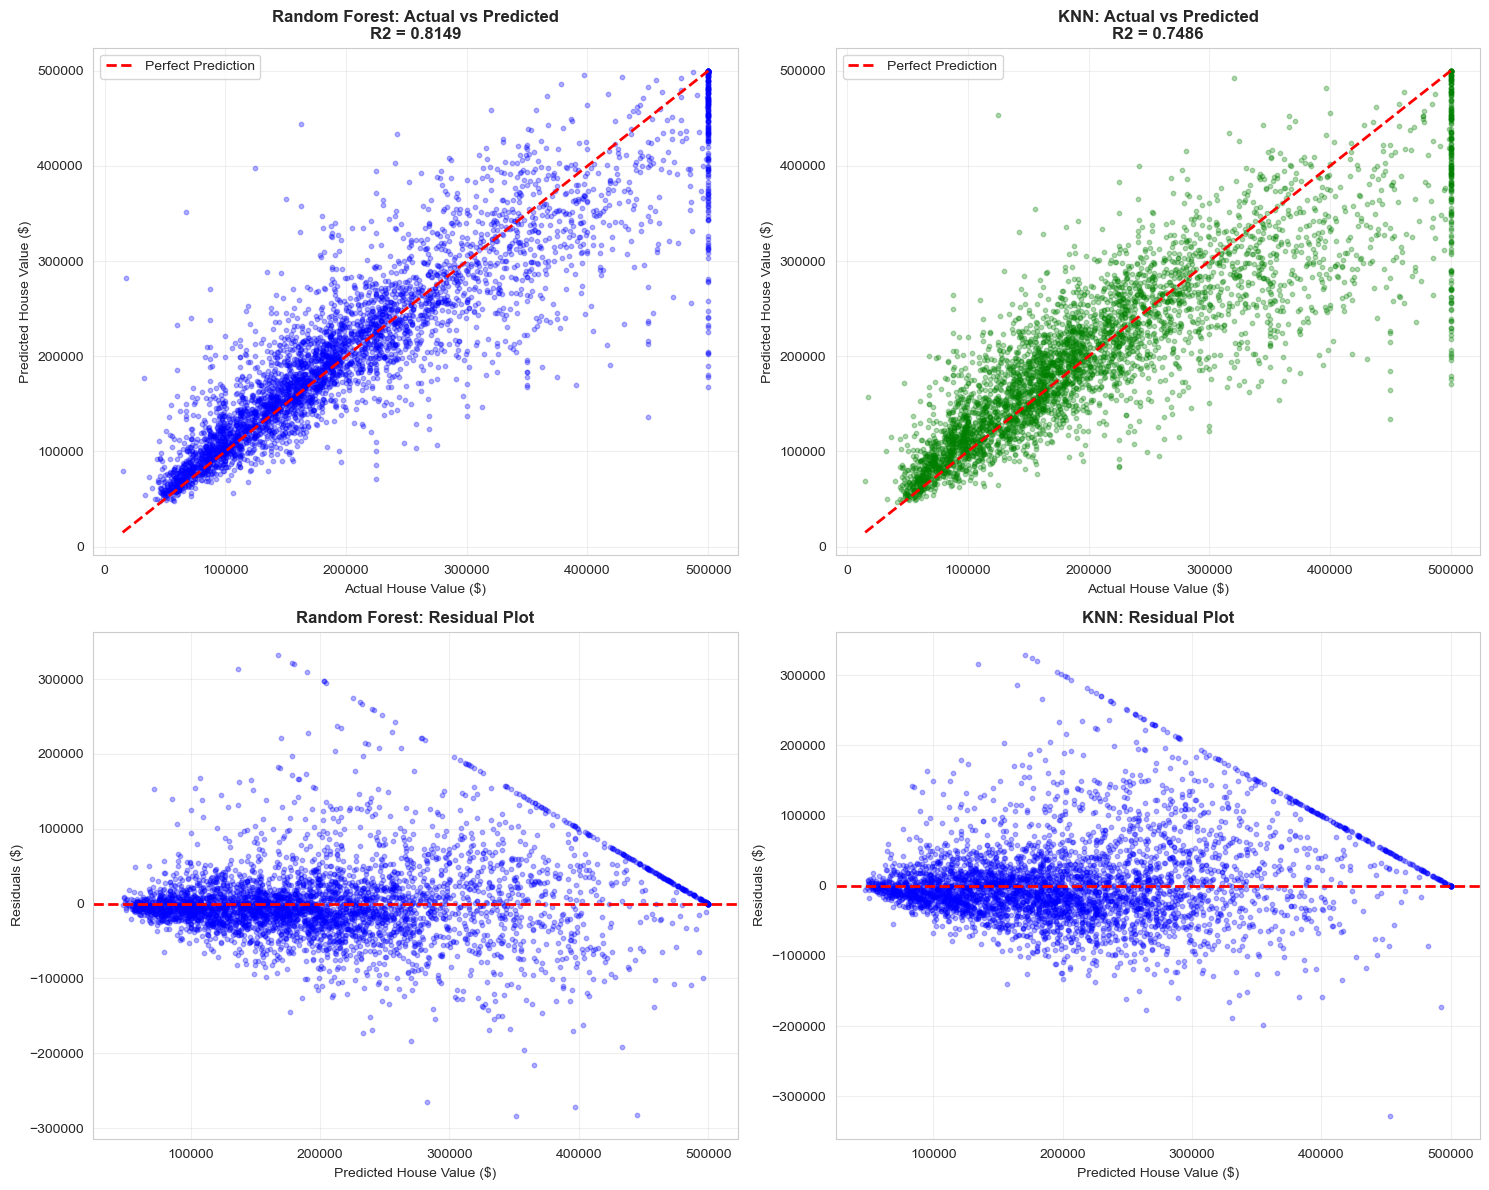

 Grid search visualization saved to:


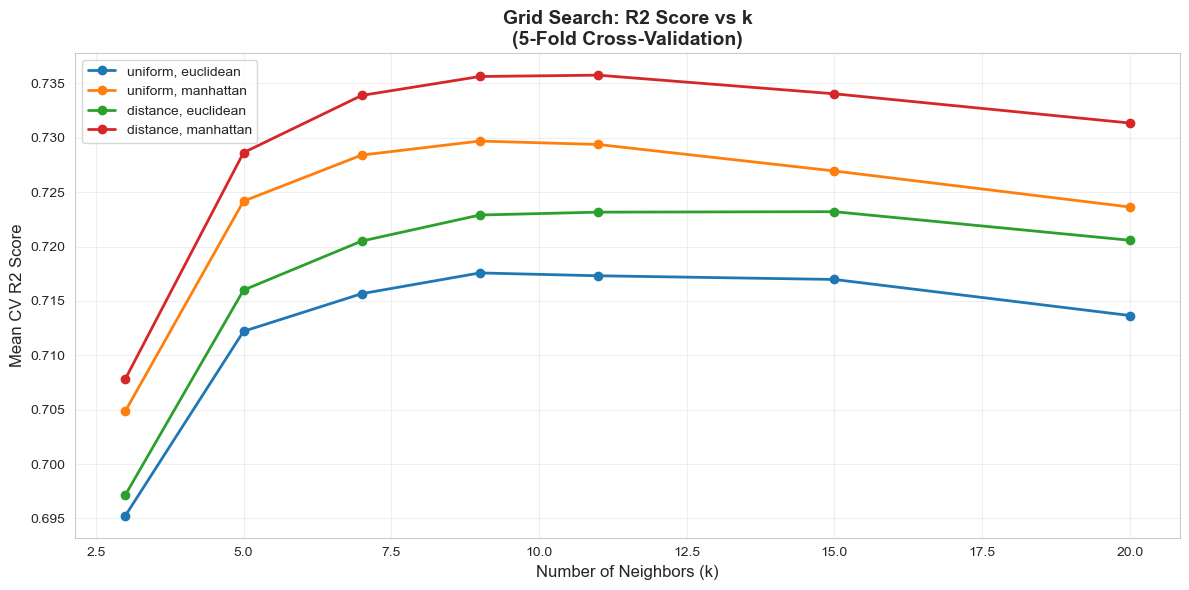

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

class HousingAnalysisPipeline:
    """Complete pipeline for Housing dataset analysis"""
    
    def __init__(self, filepath):
        """Initialize pipeline with housing data file path"""
        self.filepath = filepath
        self.df = None
        self.X_train = None
        self.X_test = None
        self.y_train = None  
        self.y_test = None
        self.rf_model = None
        self.knn_model = None
        self.scaler = StandardScaler()
    
# Step 1: Loading the data
    def load_data(self):
        """Load housing data from CSV file"""
        print("="*60)
        print("Step 1: Loading Housing Data")
        print("="*60)
        try:
            self.df = pd.read_csv('C:/Users/nghel/Downloads/housing.csv')
            print(f"✓ Data loaded successfully")
            print(f"  Shape: {self.df.shape}")
            print(f"  Rows: {self.df.shape[0]:,}")
            print(f"  Columns: {self.df.shape[1]}")
            print(f"\n  Columns: {', '.join(self.df.columns.tolist())}")
            return self.df
        except Exception as e:
            print(f"✗ Error loading data: {e}")
            return None
    
# Step 2: Exploratory data analysis - understand what's in data before modeling
    def explore_data(self):
        """Perform exploratory data analysis"""
        print("\n" + "="*60)
        print("Step 2: Exploratory Data Analysis")
        print("="*60)
        
        # Basic Information
        print("\n---Dataset Info---")
        print(self.df.info())

        # Statisical summary
        print("\n---Statistical Summary ---")
        print(self.df.describe())

        # Missing values
        print("\n---Missing Values Analysis ---")
        missing = self.df.isnull().sum()
        missing_pct = (missing/len(self.df))*100
        missing_df = pd.DataFrame({
            'Missing Count': missing,
            'Percentage': missing_pct
        })
        missing_data = missing_df[missing_df['Missing Count'] >0].sort_values('Missing Count', ascending=False)

        if len(missing_data) > 0:
            print(missing_data)
        else:
            print("No missing values found")

        # Categorical column analysis
        print("\n--- Ocean Proximity Distribution ---")
        print(self.df['ocean_proximity'].value_counts())

        # Target variable statisics 
        print("\n---Median House Value Statistics ---")
        print(f" Mean: ${self.df['median_house_value'].mean():,.2f}")
        print(f" Median: ${self.df['median_house_value'].median():,.2f}")
        print(f" Min: ${self.df['median_house_value'].min():,.2f}")
        print(f" Max: ${self.df['median_house_value'].max():,.2f}")
        print(f" Std Dev: ${self.df['median_house_value'].std():,.2f}")

        return missing_df

# Step 3: Data cleaning
    def clean_data(self):
        """Clean and preprocess housing data"""
        print("\n"+ "="*60)
        print("Step 3: Data Cleaning")
        print("="*60)

        initial_rows = len(self.df)

        # Remove duplicate rows
        duplicates = self.df.duplicated().sum()
        if duplicates > 0:
            self.df = self.df.drop_duplicates()
            print(f"✓ Removed {duplicates} duplicate rows")
        else:
            print("✓ No duplicate rows found")


        # Handle missing values in total_bedrooms
        missing_bedrooms = self.df['total_bedrooms'].isnull().sum()
        if missing_bedrooms > 0:
            median_bedrooms = self.df['total_bedrooms'].median()
            self.df['total_bedrooms'].fillna(median_bedrooms, inplace = True)
            print(f" Filled {missing_bedrooms} missing values in 'total_bedrooms' with median ({median_bedrooms})")

        # Check for any remaining missing values 
        remaining_missing = self.df.isnull().sum().sum()
        if remaining_missing == 0:
            print("No remaining missing values")

        print(f"Final dataset: {len(self.df):,} rows")

# Step 4a: Feature engineering (before splitting)
    def engineer_features(self):
        """Create new derived features"""
        print("\n" + "="*60)
        print("Step 4: Feature Engineering (Derived Features)")
        print("="*60)

        # Create new features
        print("\n[A]Creating derived features")

        # Rooms per household
        self.df['rooms_per_household'] = self.df['total_rooms'] / self.df['households']
        print("Created 'rooms_per_household'")

        # Bedrooms per room
        self.df['bedrooms_per_room'] = self.df['total_bedrooms'] / self.df['total_rooms']
        print("Created 'bedrooms_per_room'")

        # Population per household
        self.df['population_per_household'] = self.df['population'] / self.df['households']
        print("Created 'population_per_household'")

        return self.df

# Step 5: Data Visualization
    def visualize_data(self):
        """Create visualizations"""
        print("\n" + "="*60)
        print("Step 5: Data Visualization")
        print("="*60)

        # Create multiple visualization plots
        fig = plt.figure(figsize=(18, 12))

        # 1. Target variable distribution
        plt.subplot(3, 3, 1)
        plt.hist(self.df['median_house_value'], bins=50, edgecolor='black')
        plt.title('Distribution of Median House Values')
        plt.xlabel('Median House Value ($)')
        plt.ylabel('Frequency')
        plt.ticklabel_format(style='plain', axis='X')

        # 2. Geographic scatter plot
        plt.subplot(3, 3, 2)
        scatter = plt.scatter(self.df['longitude'], self.df['latitude'],
                              c=self.df['median_house_value'], cmap='viridis',
                                alpha = 0.4, s=10)
        plt.colorbar(scatter, label='Median House Value')
        plt.title('Geographic Distribution of Houses')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')

        # 3. Ocean proximity distribution
        plt.subplot(3, 3, 3)
        self.df['ocean_proximity'].value_counts().plot(kind='bar')
        plt.title('Distribtion by Oceam Proximity')
        plt.xlabel('Ocean Proximity')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')

        # 4. Median Income vs House Value
        plt.subplot(3, 3, 4)
        plt.scatter(self.df['median_income'], self.df['median_house_value'],
                    alpha=0.3, s=10)
        plt.title('Median Income vs House Value')
        plt.xlabel('Median Income')
        plt.ylabel('Median House Value')

        # 5. Housing Age Distrubtion
        plt.subplot(3, 3, 5)
        plt.hist(self.df['housing_median_age'], bins=30, edgecolor='black')
        plt.title('Distribution of Housing Age')
        plt.xlabel('Housing Median Age (years)')
        plt.ylabel('Frequency')

        # 6. Total Rooms distribution
        plt.subplot(3, 3, 6)
        plt.hist(self.df['total_rooms'], bins=50, edgecolor='black')
        plt.title('Distribution of Total Rooms')
        plt.xlabel('Total Rooms')
        plt.ylabel('Frequency')
        plt.xlim(0, 10000)

        # 7. Correlation heatmap 
        plt.subplot(3, 3, 7)
        numerical_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 
                          'population', 'households', 'median_income', 'median_house_value']
        correlation = self.df[numerical_cols].corr()
        sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',
                    center=0, square=True, linewidths=1)
        plt.title('Correlation Heatmap')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)

        # 8. Population per Household
        plt.subplot(3, 3, 8)
        plt.hist(self.df['population'] / self.df['households'], bins=50, edgecolor='black')
        plt.title('Population per Household')
        plt.xlabel('Population per Household')
        plt.ylabel('Frequency')
        plt.xlim(0,10)

        # 9. Boxplot of House Values by Ocean Proximity
        plt.subplot(3, 3, 9)
        self.df.boxplot(column='median_house_value', by='ocean_proximity', ax=plt.gca())
        plt.title('House Values by Ocean Proximity')
        plt.xlabel('Ocean Proximity')
        plt.ylabel('Median House Value')
        plt.xticks(rotation=45, ha='right')
        plt.suptitle('') #Remove default title

        plt.tight_layout()
        plt.savefig('C:/Users/nghel/Downloads/housing_visualizations.png', dpi=300, bbox_inches='tight')
        print("Comprehensive visualizations saved to 'housing_visualizations.png'")
        plt.show()
        
        return fig

# Step 4b: Train/Test Split (before one-hot encoding and scaling)
    def split_data(self):
        """Split data into train and test sets before encoding and scaling"""
        print("\n" + "="*60)
        print("Step 4B: Test-Train Split")
        print("="*60)

        print("\n IMPORTANT: Splitting BEFORE one-hot encoding and scaling")
        print(" This prevents data leakage from test set to training set\n")

        # Separate features and target
        target = 'median_house_value'
        feature_cols = [col for col in self.df.columns if col != target]

        X = self.df[feature_cols].copy()
        y = self.df[target]

        # Split the data
        X_train_raw, X_test_raw, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        return X_train_raw, X_test_raw

# Step 4c: One-Hot Encoding (after splitting)
    def apply_one_hot_encoding(self, X_train_raw, X_test_raw):
        """Apply one-hot encoding to train and test sets separately"""
        print("\n" + "="*60)
        print("Step 4C: One-Hot Encoding (Post-Split)")
        print("="*60)

        print("\n[Applying one-hot encoding separately to train and test sets]")
        print(f" Original categories: {X_train_raw['ocean_proximity'].unique().tolist()}")

        # One-hot encode training set
        train_encoded = pd.get_dummies(X_train_raw['ocean_proximity'], prefix='ocean', drop_first=False)
        X_train_no_cat = X_train_raw.drop('ocean_proximity', axis=1)
        self.X_train = pd.concat([X_train_no_cat, train_encoded], axis=1)

        # One-hot encode test set
        test_encoded = pd.get_dummies(X_test_raw['ocean_proximity'], prefix='ocean', drop_first=False)
        X_test_no_cat = X_test_raw.drop('ocean_proximity', axis=1)
        self.X_test = pd.concat([X_test_no_cat, test_encoded], axis=1)

        # Ensure test set has same columns as train set
        for col in self.X_train.columns:
            if col not in self.X_test.columns:
                self.X_test[col] = 0
        self.X_test = self.X_test[self.X_train.columns]

        print(f" One-hot encoding created {len(train_encoded.columns)} binary columns:")
        for col in train_encoded.columns:
            print(f"    - {col}")

        print(f"\n Train features shape: {self.X_train.shape}")
        print(f" Test features shape: {self.X_test.shape}")
        print(f" Total features: {self.X_train.shape[1]}")

        return self.X_train, self.X_test

# Step 4d: Feature Scaling (after splitting and encoding)
    def scale_features(self):
        """Scale features using Standard Scaler (fit on train, transform both)"""
        print("\n" + "="*60)
        print("Step 4D: Feature Scaling (Post-Split)")
        print("="*60)

        print("\n Important: Fit scaler on training data only!")
        print(" Then transform both train and test sets\n")

        # Fit scaler on training data only
        self.scaler = StandardScaler()
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)

        # Transform test data using training statistics 
        self.X_test_scaled = self.scaler.transform(self.X_test)

        print(" Features scaled using StandardScaler")
        print(f" Training set mean: {self.X_train_scaled.mean():.6f} (should be ~0)")
        print(f" Training set std: {self.X_train_scaled.std():.6f} (should be ~1)")
        print(f" Test set mean: {self.X_test_scaled.mean():.6f}")
        print(f" Test set std: {self.X_test_scaled.std():.6f}")

        return self.X_train_scaled, self.X_test_scaled
                                                   
# Step 6: Model Training
    def train_models(self):
        """Train both Random Forest and KNN with Grid Search"""
        print("\n" + "="*60)
        print("Step 6: Model Training")
        print("="*60)

        # 1. Train Random Forest
        print("\n[1] Training Random Forest Regressor")
        self.rf_model = RandomForestRegressor(
            n_estimators=100,
            max_depth=20,
            random_state=42,
            n_jobs=-1
        )
        self.rf_model.fit(self.X_train_scaled, self.y_train)

        y_train_pred_rf= self.rf_model.predict(self.X_train_scaled)
        train_r2_rf = r2_score(self.y_train, y_train_pred_rf)
        train_rmse_rf = np.sqrt(mean_squared_error(self.y_train, y_train_pred_rf))

        print(f"Random Forest trained successfully")
        print(f" Training R2 Score: {train_r2_rf:.4f}")
        print(f" Training RMSE: ${train_rmse_rf:,.2f}")

        # 2. Train KNN with Grid Search
        print("\n[2] Training K-Nearest Neighbors with Grid Search")
        print("Performing hyperparamter tuning to find optimal k")

        # Define parameter grid
        param_grid = {
            'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }

        knn_base = KNeighborsRegressor(n_jobs =-1)

        # Grid Search with 5-fold CV
        grid_search = GridSearchCV(
            estimator=knn_base, 
            param_grid=param_grid, 
            cv=5,
            scoring='r2',
            n_jobs=-1,
            verbose=0
        )

        print(f" Grid Search Parameters:")
        print(f"    - n_neighbors: {param_grid['n_neighbors']}")
        print(f"    - weights: {param_grid['weights']}")
        print(f"    - metric: {param_grid['metric']}")
        print(f"    - Total combinations: {len(param_grid['n_neighbors']) * len(param_grid['weights']) * len(param_grid['metric'])}")
        print(f"    - Cross-validation folds: 5")
        print(f"\n  Searching for best hyperparameters")

        grid_search.fit(self.X_train_scaled, self.y_train)

        self.knn_model = grid_search.best_estimator_
        self.grid_search_results = pd.DataFrame(grid_search.cv_results_)

        print(f"\n  Grid Search completed!")
        print(f"  Best Parameters:")
        print(f"    - n_neighbors: {grid_search.best_params_['n_neighbors']}")
        print(f"    - weights: {grid_search.best_params_['weights']}")
        print(f"    - metric: {grid_search.best_params_['metric']}")
        print(f"  Best CV R² Score: {grid_search.best_score_:.4f}")

        y_train_pred_knn = self.knn_model.predict(self.X_train_scaled)
        train_r2_knn = r2_score(self.y_train, y_train_pred_knn)
        train_rmse_knn = np.sqrt(mean_squared_error(self.y_train, y_train_pred_knn))

        print(f"\n KNN (optimized) trained successfully")
        print(f" Training R2 Score: {train_r2_knn:.4f}")
        print(f" Training RMSE: ${train_rmse_knn:,.2f}")

        return self.rf_model, self.knn_model, grid_search

# Step 7: Model Evaluation
    def evaluate_models(self):
        """Evaluate both models on test set"""
        print("\n" + "="*60)
        print("Step 7: Model Evaluation")
        print("="*60)

        # Random Forest Predictions
        y_pred_rf = self.rf_model.predict(self.X_test_scaled)
        r2_rf = r2_score(self.y_test, y_pred_rf)
        rmse_rf = np.sqrt(mean_squared_error(self.y_test, y_pred_rf))
        mae_rf = mean_absolute_error(self.y_test, y_pred_rf)

        # KNN Predictions
        y_pred_knn = self.knn_model.predict(self.X_test_scaled)
        r2_knn = r2_score(self.y_test, y_pred_knn)
        rmse_knn = np.sqrt(mean_squared_error(self.y_test, y_pred_knn))
        mae_knn = mean_absolute_error(self.y_test, y_pred_knn)

        # Print Comparison
        print(f"\n{'='*60}")
        print(f"{'Model Performance Comparison':^60}")
        print(f"{'='*60}")
        print(f"\n{'Metric':<25}{'Random Forest':>15}{'KNN':>15}")
        print(f"{'-'*60}")
        print(f"{'R2 Score':<25}{r2_rf:15.4f}{r2_knn:>15.4f}")
        print(f"{'RMSE':<25} ${rmse_rf:>14,.2f} ${rmse_knn:>14,.2f}")
        print(f"{'MAE':<25} ${mae_rf:>14,.2f} ${mae_knn:>14,.2f}")
        print(f"{'-'*60}")

        if r2_rf > r2_knn:
            print(f"\n Better Model is Random Forest (Better R2 Score: {r2_rf:.4f} vs {r2_knn:.4f})")
        else: 
            print(f"\n Better Model is KNN (Better R2 Score: {r2_knn:.4f} vs {r2_rf:.4f})")

        # Create visualization 
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # RF: Actual vs Predicted
        axes[0,0].scatter(self.y_test, y_pred_rf, alpha=0.3, s=10, color='blue')
        axes[0,0].plot([self.y_test.min(), self.y_test.max()],
                       [self.y_test.min(), self.y_test.max()],
                       'r--', lw=2, label='Perfect Prediction')
        axes[0,0].set_xlabel('Actual House Value ($)')
        axes[0,0].set_ylabel('Predicted House Value ($)')
        axes[0,0].set_title(f'Random Forest: Actual vs Predicted\nR2 = {r2_rf:.4f}', fontweight='bold')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)

        # KNN: Actual vs Predicted
        axes[0,1].scatter(self.y_test, y_pred_knn, alpha=0.3, s=10, color='green')
        axes[0,1].plot([self.y_test.min(), self.y_test.max()],
                       [self.y_test.min(), self.y_test.max()],
                       'r--', lw=2, label='Perfect Prediction')
        axes[0,1].set_xlabel('Actual House Value ($)')
        axes[0,1].set_ylabel('Predicted House Value ($)')
        axes[0,1].set_title(f'KNN: Actual vs Predicted\nR2 = {r2_knn:.4f}', fontweight = 'bold')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)

        # RF: Residuals
        residuals_rf = self.y_test - y_pred_rf
        axes[1,0].scatter(y_pred_rf, residuals_rf, alpha=0.3, s=10, color='blue')
        axes[1,0].axhline(y=0, color='r', linestyle='--', lw=2)
        axes[1,0].set_xlabel('Predicted House Value ($)')
        axes[1,0].set_ylabel('Residuals ($)')
        axes[1,0].set_title('Random Forest: Residual Plot', fontweight='bold')
        axes[1,0].grid(True, alpha=0.3)

        # KNN: Residuals
        residuals_knn = self.y_test - y_pred_knn
        axes[1,1].scatter(y_pred_knn, residuals_knn, alpha=0.3, s=10, color='blue')
        axes[1,1].axhline(y=0, color='r', linestyle='--', lw=2)
        axes[1,1].set_xlabel('Predicted House Value ($)')
        axes[1,1].set_ylabel('Residuals ($)')
        axes[1,1].set_title('KNN: Residual Plot', fontweight='bold')
        axes[1,1].grid(True, alpha=0.3)

        plt.tight_layout()

        import os
        save_path = 'C:/Users/nghel/Downloads/model_comparison.png'
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"\n Model comparison plots saved to:")
        plt.show()
        
        # Grid search visualization
        if hasattr(self, 'grid_search_results'):
            fig, ax = plt.subplots(1,1, figsize=(12,6))

            for weight in ['uniform', 'distance']:
                for metric in ['euclidean', 'manhattan']:
                    mask = ((self.grid_search_results['param_weights'] == weight) & 
                           (self.grid_search_results['param_metric'] == metric))
                    subset =self.grid_search_results[mask].sort_values('param_n_neighbors')


                    label = f"{weight}, {metric}"
                    ax.plot(subset['param_n_neighbors'],
                            subset['mean_test_score'], 
                            marker='o', label=label, linewidth=2)

            ax.set_xlabel('Number of Neighbors (k)', fontsize=12)
            ax.set_ylabel('Mean CV R2 Score', fontsize=12)
            ax.set_title('Grid Search: R2 Score vs k\n(5-Fold Cross-Validation)',
                         fontsize=14, fontweight='bold')
            ax.legend(loc='best')
            ax.grid(True, alpha=0.3)

            plt.tight_layout()

            save_path =  'C:/Users/nghel/Downloads/grid_search_results.png'
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f" Grid search visualization saved to:")
            plt.show()
            
        results = {
            'rf': {'predictions': y_pred_rf, 'r2':r2_rf, 'rmse': rmse_rf, 'mae':mae_rf}, 
            'knn': {'predictions': y_pred_knn, 'r2': r2_knn, 'rmse': rmse_knn, 'mae': mae_knn}
        }

        return results
        
if __name__ == "__main__":
    # Create pipeline instance
    pipeline = HousingAnalysisPipeline('C:/Users/nghel/Downloads/housing.csv')
    
    # Run the analysis steps
    pipeline.load_data()
    pipeline.explore_data()
    pipeline.clean_data()
    pipeline.engineer_features()
    pipeline.visualize_data()
    X_train_raw, X_test_raw = pipeline.split_data()
    pipeline.apply_one_hot_encoding(X_train_raw, X_test_raw)
    pipeline.scale_features()
    pipeline.train_models()
    results = pipeline.evaluate_models()


In [ ]:
# Write your code here 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Write your code here:

In [ ]:
# Write your code here

### Conclusions
For what values of n_neighbors and weight does KNeighborsRegressor perform the best? Does it perform as well on the housing data as the linear regressor from the lectures? Why do you think this is?

<pre> The KNeighborsRegressor performs best with n_neighbors = 11 and with distance weighting. k = 11 balances bias and variance whereas if k is too small (k=3,5), it results in overfitting as the model is too sensitive to individual data points and captures noise. On the other hand, if k is too large (k=15,20), it results in underfitting where the model becomes too smooth and misses important points. With distance weighting, closer neighbours have more influence whereas far neighbours have less. This makes sense because: 1) houses with similar features should have more influence, 2) distance weighting minimizes impact if the 11th neighbour is much different, and 3) distance is a better signal of similarity than compared to being in the top 11 neighbors.  </pre>

### Read appending B

- Reflect on your last data project, read appendix B. Then, write down a few of the checklist items that your last data project could have used. If you have not yet done a data project, then write down a few of the items that you found most interesting.


In [ ]:
Check list of items that data project could have used: 
    - documentation - justification for each choice
    - list of assumptions that were made for the project and verification if assumptions were possible
    - check for multicollinearity between features 
    - evaluate input data quality
    - improve connecting technical metrics to real-world/business impact




### Submit your notebook

Submit your solution to Quercus
Make sure you rename your notebook to    
W2_UTORid.ipynb    
Example W2_adfasd01.ipynb
